In [2]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle

First we initialize the lists and object points from given checkboard inner corner numbers!

In [3]:
object_points_list = []  # 3d points in real world space. (Same for all)
image_points_list = []  # 2d points in image plane.

nx, ny = 9, 6  # inside corners in rows, columns
object_points = np.zeros((nx * ny, 3), np.float32)
object_points[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

* And we extract image corner points from each image and append them to image list.
* Also append object points list a mere copy of what's above.
* Also let's visualize all image corner points on given images for ones opencv managed to find!

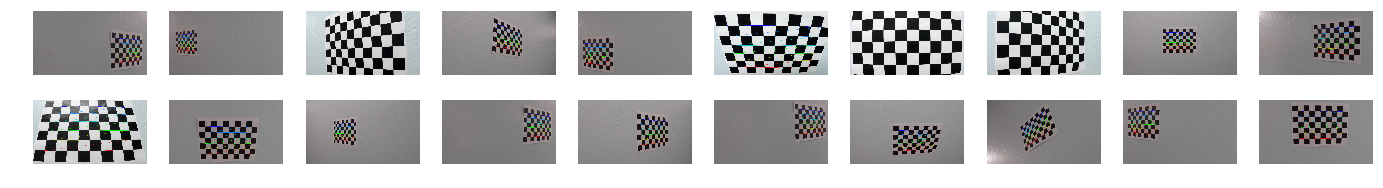

In [4]:
images = glob.glob("camera_cal/calibration*.jpg")
assert len(images) == 20
plt.figure(figsize=(24, 3))
for i in range(len(images)):
    img = cv2.imread(images[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    retval, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if retval:
        cv2.drawChessboardCorners(img, (nx, ny), corners, retval)
        image_points_list.append(corners)
        object_points_list.append(object_points)
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    plt.imshow(img)

* Now let's first calibrate the camera with collected image corner points, image size and object points.
* Then apply undistortion with returned parameters!

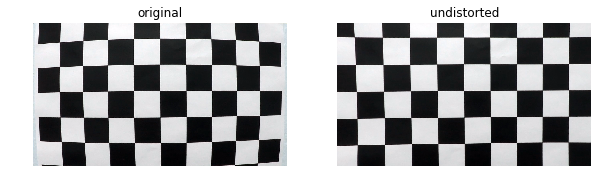

In [5]:
plt.figure(figsize=(10, 10))
img = cv2.imread(images[6])
plt.subplot(1, 2, 1)
plt.title('original')
plt.axis('off')
plt.imshow(img)

img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points_list, image_points_list, img_size, None, None)
img = cv2.undistort(img, mtx, dist, None, mtx)

plt.subplot(1, 2, 2)
plt.title('undistorted')
plt.axis('off')
plt.imshow(img);

* Clearly undistortion works.
* We only used **mtx** and **dist** (cameraMatrix and distCoeffs) for calculating undistortion.
* Now let's pickle them for later use!

In [6]:
print('"Just to know what they look like,"\n')
print('cameraMatrix= ', mtx, '\n')
print('distCoeffs= ', dist)

"Just to know what they look like,"

cameraMatrix=  [[  1.15777930e+03   0.00000000e+00   6.67111054e+02]
 [  0.00000000e+00   1.15282291e+03   3.86128937e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]] 

distCoeffs=  [[-0.24688775 -0.02373133 -0.00109842  0.00035108 -0.00258571]]


In [7]:
dumpling = {'mtx': mtx, 'dist': dist}
pickle.dump(dumpling, open("camera_calibration_param.p", "wb"))

In [7]:
with open("camera_calibration_param.p", mode='rb') as f:
    calibration_param = pickle.load(f)
bla1, bla2 = calibration_param["mtx"], calibration_param["dist"]
print('Testing pickles:')
print('mtx= ', bla1, '\n')
print('dist= ', bla2)

Testing pickles:
mtx=  [[  1.15777930e+03   0.00000000e+00   6.67111054e+02]
 [  0.00000000e+00   1.15282291e+03   3.86128937e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]] 

dist=  [[-0.24688775 -0.02373133 -0.00109842  0.00035108 -0.00258571]]


Successfully pickled + unpickled, now we can use these in next steps.